# The Normalized Difference Vegetation Index (NDVI) 

In [38]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

# Import the NumPy module
import numpy as np


In [39]:
# Open a GDAL dataset
dataset = gdal.Open('/Users/droy/Desktop/Digital Globe/056239125030_01/056239125030_01_P006_MUL/15MAY03051958-M2AS_R3C4-056239125030_01_P006.TIF', gdal.GA_ReadOnly)

# Allocate our array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType
print(dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount)
image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    print(band)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()
    

print('Red band mean: {r}'.format(r=image[:, :, 5].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, :, 7].mean()))

331 294 8
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x107a56d20> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x1073c6d80> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x107a56d20> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x1073c6d80> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x107a56d20> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x1073c6d80> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x107a56d20> >
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x1073c6d80> >
Red band mean: 476.542717389
NIR band mean: 510.875290297


# CHANGE BAND BASED ON THE SENSOR

In [40]:
b_red = 5 #WV3, WV2
b_nir = 7 #WV3, WV2

#b_red = 3 #QB
#b_nir = 4 #QB

ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / (image[:, :, b_red] + image[:, :, b_nir])

print(ndvi)
print(ndvi.max())

[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [68 72 66 ...,  0  0  0]
 [72 70 64 ...,  0  0  0]
 [56 58 71 ...,  0  0  0]]
213


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


# NDVI
To calculate NDVI, we can simply use standard arithmetic operators in Python because these operations in NumPy are vectorized. , NEVER loop over a NumPy array unless you can avoid it.


In [41]:
ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / \
        (image[:, :, b_nir] + image[:, :, b_red]).astype(np.float64)

print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=np.nanmax(ndvi)))
print('Mean NDVI: {m}'.format(m=np.nanmean(ndvi)))
print('Median NDVI: {m}'.format(m=np.nanmedian(ndvi)))
print('Min NDVI: {m}'.format(m=np.nanmin(ndvi)))


NDVI matrix: 
[[  5.74443142e-02   5.57620818e-02   8.47457627e-02 ...,              nan
               nan              nan]
 [  7.51445087e-02   7.67356882e-02   2.59579728e-02 ...,              nan
               nan              nan]
 [  3.53260870e-02   7.30948678e-02   5.20231214e-02 ...,              nan
               nan              nan]
 ..., 
 [  6.85476440e+01   7.25782464e+01   6.63569980e+01 ...,              nan
               nan              nan]
 [  7.23392265e+01   7.08097297e+01   6.44192913e+01 ...,              nan
               nan              nan]
 [  5.68696785e+01   5.83898305e+01   7.19296703e+01 ...,              nan
               nan              nan]]

Max NDVI: 213.182410423
Mean NDVI: 23.4189453673
Median NDVI: 0.118040089087
Min NDVI: 0.0


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
print('Array shape before: {shp} (size is {sz})'.format(shp=image[:, :, 3].shape, sz=image[:, :, 3].size))

red = np.ndarray.flatten(image[:, :, 2])
nir = np.ndarray.flatten(image[:, :, 3])

print('Array shape after: {shp} (size is {sz})'.format(shp=nir.shape, sz=nir.size))

Array shape before: (331, 294) (size is 97314)
Array shape after: (97314,) (size is 97314)


We have retained the number of entries in each of these raster bands, but we have flattened them from 2 dimensions into 1.
Now we can plot them. Since we just want points, we can use scatter for a scatterplot. Since there are no lines in a scatterplot, it has a slightly different syntax.

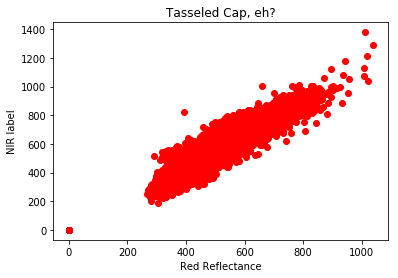

In [44]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

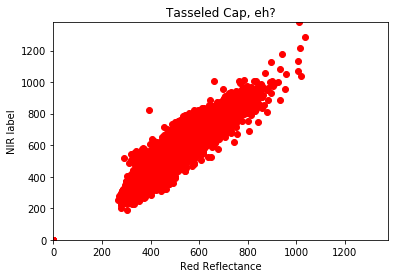

In [45]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Calculate min and max
plot_min = min(red.min(), nir.min())
plot_max = max(red.max(), nir.max())

plt.xlim((plot_min, plot_max))
plt.ylim((plot_min, plot_max))

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

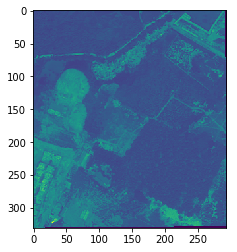

In [46]:
# use "imshow" for an image -- nir at first
plt.imshow(image[:, :, 3])

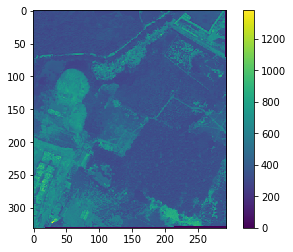

In [47]:
# use "imshow" for an image -- nir at first
plt.imshow(image[:, :, 3])
plt.colorbar()

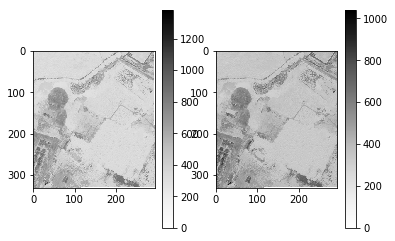

In [48]:
# use "imshow" for an image -- nir in first subplot, red in second
plt.subplot(121)
plt.imshow(image[:, :, 3], cmap=plt.cm.Greys)
plt.colorbar()

# Now red band in the second subplot (indicated by last of the 3 numbers)
plt.subplot(122)
plt.imshow(image[:, :, 2], cmap=plt.cm.Greys)
plt.colorbar()

Plotting 3D arrays - multispectral images
Greyscale images are nice, but the most information we can receive comes from looking at the interplay among different bands. To accomplish this, we can map different spectral bands to the Red, Green, and Blue channels on our monitors.
Before we can do this, the matplotlib imshow help tells us that we need to normalize our bands into a 0 - 1 range. To do so, we will perform a simple linear scale fitting 0 reflectance to 0 and 80% reflectance to 1, clipping anything larger or smaller.
Remember:

If we are going from a Int16 datatype (e.g., reflectance scaled by 10,000x) to a decimal between 0 and 1, we will need to use a Float!

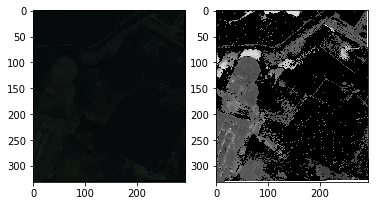

In [49]:
# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[:, :, index].astype(np.float64)

max_val = 8000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.subplot(121)
plt.imshow(colors)

# Show NDVI
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)

# THE END